# About The Dataset

The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from http://www.bom.gov.au/climate/dwo/.

This dataset contains observations of weather metrics for each day from 2008 to 2017

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow

# -> Our goal is to predict 'RainTomorrow

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


In [227]:
#Import the required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score,jaccard_score,f1_score,log_loss
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [228]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [229]:
df=pd.read_csv(path)
df.head()
#save the data to a csv file
df.to_csv('weather_data.csv', index=False)
df=pd.read_csv('weather_data.csv')
df.head()


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [260]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Data Preprocessing-
One Hot Encoding


In [231]:
df_sydney_processed = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])


In [232]:
df_sydney_processed.replace(['No','Yes'],[0,1],inplace=True)

C:\Users\CC-Student\AppData\Local\Temp\ipykernel_8212\3511984087.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sydney_processed.replace(['No','Yes'],[0,1],inplace=True)


Training Data and Test Data

In [233]:
df_sydney_processed.drop('Date', axis=1, inplace=True)

In [234]:
df_sydney_processed = df_sydney_processed.astype(float)

In [235]:
feauters = df_sydney_processed.drop('RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(feauters, Y, test_size=0.2, random_state=10)

Linear Regression


In [237]:
# Create and train the Linear Regression model
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

# Predict using the testing data
predictions = LinearReg.predict(X_test)

# Calculate the metrics
LinearReg_MAE = mean_absolute_error(y_test, predictions)
LinearReg_MSE = mean_squared_error(y_test, predictions)
LinearReg_R2 = r2_score(y_test, predictions)

# Since Linear Regression is not a classification model, we need to convert predictions to binary for classification metrics
binary_predictions = np.where(predictions > 0.5, 1, 0)

LinearReg_Accuracy_Score = accuracy_score(y_test, binary_predictions)
LinearReg_JaccardIndex = jaccard_score(y_test, binary_predictions)
LinearReg_F1_Score = f1_score(y_test, binary_predictions)
LinearReg_LogLoss = log_loss(y_test, predictions)

In [238]:
# Print the metrics
print('Linear Regression Mean Absolute Error:', LinearReg_MAE)
print('Linear Regression Mean Squared Error:', LinearReg_MSE)
print('Linear Regression R2 Score:', LinearReg_R2)
print('Linear Regression Accuracy Score:', LinearReg_Accuracy_Score)
print('Linear Regression Jaccard Index:', LinearReg_JaccardIndex)
print('Linear Regression F1 Score:', LinearReg_F1_Score)
print('Linear Regression Log Loss:', LinearReg_LogLoss)

Linear Regression Mean Absolute Error: 0.2563151235798843
Linear Regression Mean Squared Error: 0.1157193111872944
Linear Regression R2 Score: 0.4271384025416668
Linear Regression Accuracy Score: 0.8366412213740458
Linear Regression Jaccard Index: 0.5136363636363637
Linear Regression F1 Score: 0.6786786786786787
Linear Regression Log Loss: 0.508871825420522


KNN model with the n_neighbors parameter set to 4.

In [240]:
KNN = KNeighborsClassifier(n_neighbors=4)

In [241]:
predictions = KNN.fit(X_train, y_train).predict(X_test)

In [242]:
KNN_Accuarcy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

print('KNN Accuarcy Score:', KNN_Accuarcy_Score)
print('KNN Jaccard Index:', KNN_JaccardIndex)
print('KNN F1 Score:', KNN_F1_Score)

KNN Accuarcy Score: 0.8183206106870229
KNN Jaccard Index: 0.4251207729468599
KNN F1 Score: 0.5966101694915255


confusion_matrix for KNN
[[448  23]
 [ 96  88]]


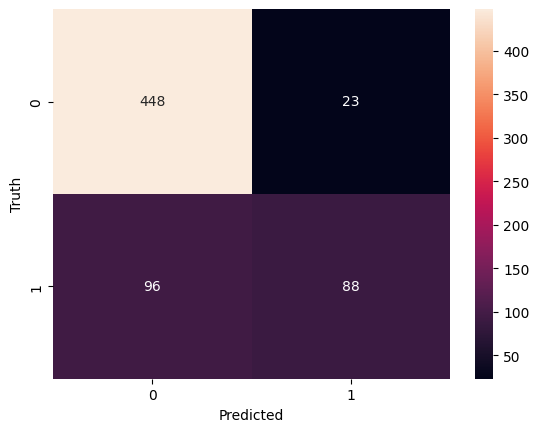

In [243]:
print('confusion_matrix for KNN')
print(confusion_matrix(y_test, predictions))

#plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Decision Tree model

In [244]:
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [245]:
predictions = Tree.fit(X_train, y_train).predict(X_test)

In [246]:
Tree_Accuarcy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

print('Decision Tree Accuarcy Score:', Tree_Accuarcy_Score)
print('Decision Tree Jaccard Index:', Tree_JaccardIndex)
print('Decision Tree F1 Score:', Tree_F1_Score)

Decision Tree Accuarcy Score: 0.8183206106870229
Decision Tree Jaccard Index: 0.48034934497816595
Decision Tree F1 Score: 0.6489675516224189


In [247]:
print('confusion_matrix for Decision Tree')
print(confusion_matrix(y_test, predictions))


confusion_matrix for Decision Tree
[[426  45]
 [ 74 110]]


Logistic Regression

with a test_size of 0.2 and the random_state set to 1.

In [248]:
X_train, X_test, y_train, y_test = train_test_split(feauters, Y, test_size=0.2, random_state=1)

In [249]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

Now, use the predict and predict_proba methods on the testing data (x_test) and save it as 2 arrays predictions and predict_proba.

In [250]:
predictions = LR.predict(X_test)

In [251]:
predict_prob = LR.predict_proba(X_test)

Using the predictions, predict_proba and the y_test dataframe calculate the value for each metric using the appropriate function.

In [252]:
LA_Accuarcy_Score = accuracy_score(y_test, predictions)
LA_JaccardIndex = jaccard_score(y_test, predictions)
LA_F1_Score = f1_score(y_test, predictions)
LA_LogLoss = log_loss(y_test, predict_prob)

print('Logistic Regression Accuarcy Score:', LA_Accuarcy_Score)
print('Logistic Regression Jaccard Index:', LA_JaccardIndex)
print('Logistic Regression F1 Score:', LA_F1_Score)
print('Logistic Regression Log Loss:', LA_LogLoss)

Logistic Regression Accuarcy Score: 0.8274809160305343
Logistic Regression Jaccard Index: 0.4840182648401826
Logistic Regression F1 Score: 0.6523076923076923
Logistic Regression Log Loss: 0.38008467482534153


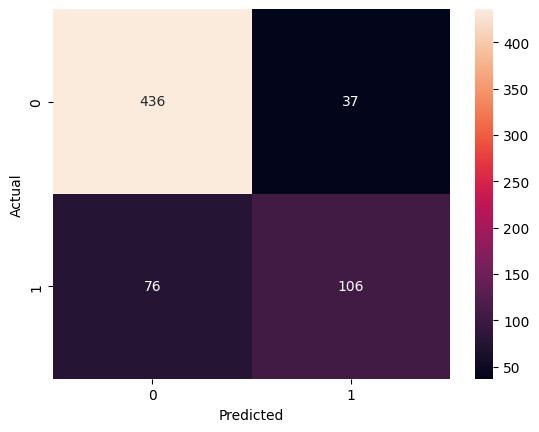

In [253]:
#plot the confusion matrix for logistic regression
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Create and train a SVM model called SVM using the training data (x_train, y_train).

In [254]:
SVM = svm.SVC(kernel='rbf')

In [255]:
predictions = SVM.fit(X_train, y_train).predict(X_test)

In [256]:
SVM_Accuarcy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

print('SVM Accuarcy Score:', SVM_Accuarcy_Score)
print('SVM Jaccard Index:', SVM_JaccardIndex)
print('SVM F1 Score:', SVM_F1_Score)


SVM Accuarcy Score: 0.7221374045801526
SVM Jaccard Index: 0.0
SVM F1 Score: 0.0


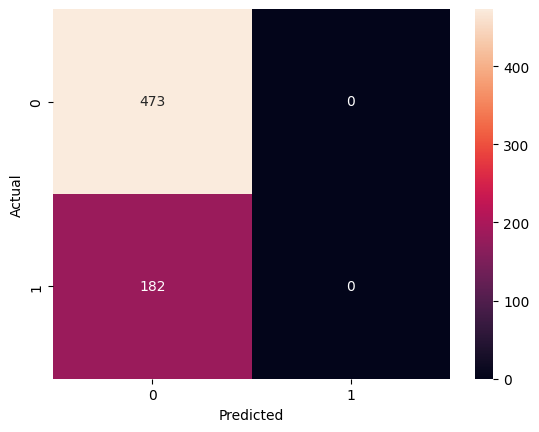

In [257]:
#plot the confusion matrix for SVM
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

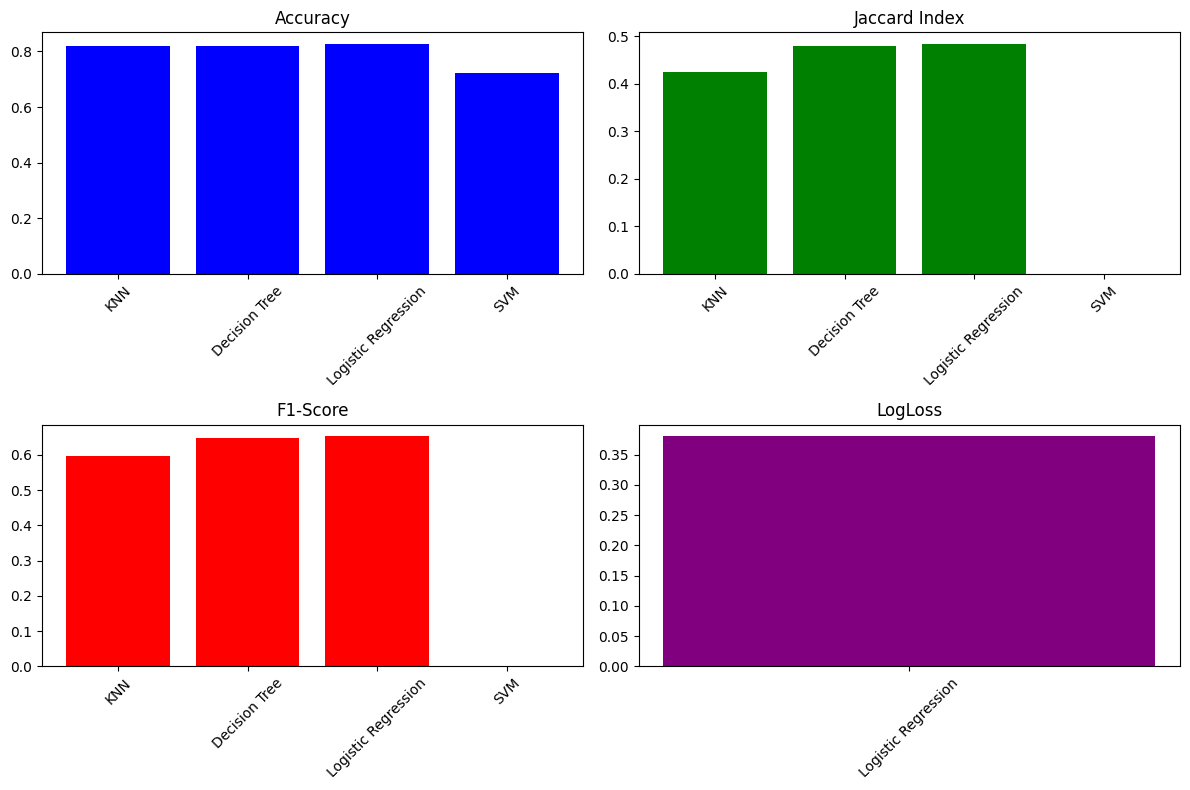

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Accuracy
plt.subplot(2, 2, 1)
plt.bar(report['Model'], report['Accuracy'], color='blue')
plt.title('Accuracy')
plt.xticks(rotation=45)

# Plot the Jaccard Index
plt.subplot(2, 2, 2)
plt.bar(report['Model'], report['Jaccard Index'], color='green')
plt.title('Jaccard Index')
plt.xticks(rotation=45)

# Plot the F1-Score
plt.subplot(2, 2, 3)
plt.bar(report['Model'], report['F1-Score'], color='red')
plt.title('F1-Score')
plt.xticks(rotation=45)

# Plot the LogLoss
plt.subplot(2, 2, 4)
plt.bar(report['Model'], report['LogLoss'], color='purple')
plt.title('LogLoss')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [259]:
#a DataFrame to display the metrics for all models
Report = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Logistic Regression', 'SVM'],
    'Accuracy': [LinearReg_Accuracy_Score, KNN_Accuarcy_Score, Tree_Accuarcy_Score, LA_Accuarcy_Score, SVM_Accuarcy_Score],
    'Jaccard Index': [LinearReg_JaccardIndex, KNN_JaccardIndex, Tree_JaccardIndex, LA_JaccardIndex, SVM_JaccardIndex],
    'F1-Score': [LinearReg_F1_Score, KNN_F1_Score, Tree_F1_Score, LA_F1_Score, SVM_F1_Score],
    'LogLoss': [LinearReg_LogLoss, None, None, LA_LogLoss, None]
})

Report

,Model,Accuracy,Jaccard Index,F1-Score,LogLoss
0,Linear Regression,0.836641,0.513636,0.678679,0.508872
1,KNN,0.818321,0.425121,0.596610,NaN
2,Decision Tree,0.818321,0.480349,0.648968,NaN
3,Logistic Regression,0.827481,0.484018,0.652308,0.380085
4,SVM,0.722137,0.000000,0.000000,NaN
